## Assignment 1

##### Brian Tang | ATM 413/543 | Feb. 10, 2022

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context("talk")

Data

In [3]:
year = np.arange(2012,2022)

quantity = np.array([1.88E9, 2.14E9, 2.37E9, 2.51E9, 2.74E9, 2.61E9, 2.50E9, 2.58E9, 2.28E9, 2.55E9])

price = np.array([6.92, 4.49, 3.71, 3.52, 3.30, 3.31, 3.59, 3.50, 4.64, 5.47])

pdsi = np.array([-3.06, 0.31, 2.28, 2.90, 3.94, 2.41, 2.40, 5.04, -0.62, -1.21])

#construct a Pandas dataframe
df = pd.DataFrame({'year':year, 'quantity':quantity, 'price':price, 'pdsi':pdsi})
df.head(n=10)

,year,quantity,price,pdsi
0,2012,1.880000e+09,6.92,-3.06
1,2013,2.140000e+09,4.49,0.31
2,2014,2.370000e+09,3.71,2.28
3,2015,2.510000e+09,3.52,2.90
4,2016,2.740000e+09,3.30,3.94
5,2017,2.610000e+09,3.31,2.41
6,2018,2.500000e+09,3.59,2.40
7,2019,2.580000e+09,3.50,5.04
8,2020,2.280000e+09,4.64,-0.62
9,2021,2.550000e+09,5.47,-1.21


1) Compute gross product for each year (2 pts)

In [4]:
df['grossproduct'] = 0.5*df['quantity']*df['price']
df.head(n=10)

,year,quantity,price,pdsi,grossproduct
0,2012,1.880000e+09,6.92,-3.06,6.504800e+09
1,2013,2.140000e+09,4.49,0.31,4.804300e+09
2,2014,2.370000e+09,3.71,2.28,4.396350e+09
3,2015,2.510000e+09,3.52,2.90,4.417600e+09
4,2016,2.740000e+09,3.30,3.94,4.521000e+09
5,2017,2.610000e+09,3.31,2.41,4.319550e+09
6,2018,2.500000e+09,3.59,2.40,4.487500e+09
7,2019,2.580000e+09,3.50,5.04,4.515000e+09
8,2020,2.280000e+09,4.64,-0.62,5.289600e+09
9,2021,2.550000e+09,5.47,-1.21,6.974250e+09


2) Construct scatter plot of quantity versus price (equilibrium values) (2 pts)

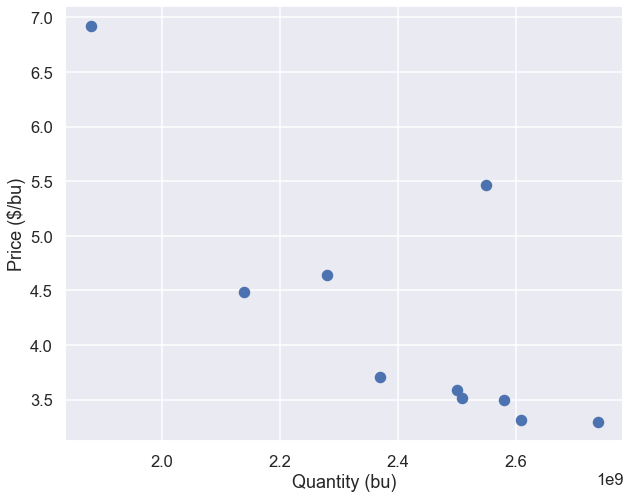

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(df['quantity'],df['price'],s=100)
plt.xlabel('Quantity (bu)')
plt.ylabel('Price ($/bu)')
plt.show()

3) Illustrate how eq. quantity and price may be affected by changes in supply curve due to more and less favorable growing conditions (2 pts)

The easiest way to illustrate is to choose two points, say the upper-leftmost point the lower-rightmost point. A supply curve from the origin to the upper-leftmost point would represent less favorable conditions (a steeper slope relative to "normal" conditions). A supply curve from the origin to the lower-rightmost point would represent more favorable conditions (a more shallow slope relative to "normal" conditions).

There are other ways a student could potentially show this relationship, but they have to explain/justify how they show it.

4) Estimate loss in gross product due to this derecho (2 pts)

First, they have to estimate a hypothetical price if the derecho did not hit. There isn't one correct way to arrive at an estimate. For example, they could use 2016 as an analog, which had a very similar quantity, and use the 2016 price (3.30/bu). They could use the PDSI information to do something similar. Or they could do something more sophisticated like a linear regression. Whatever they choose, it has to be reasonable and explained.

In [6]:
#gross product loss is hypothetical gross product (no derecho) minus actual gross product
hypothetical_quantity = 2.75E9
hypothetical_price = 3.30 #using simple analog method
loss = (0.5 * hypothetical_quantity * hypothetical_price) - df.loc[df['year']==2020,'grossproduct']
print('Estimated change: '+str(loss.values))

Estimated change: [-7.521e+08]


5) Assess how wet and dry conditions affect equilibrium quantity and price (2 pts)

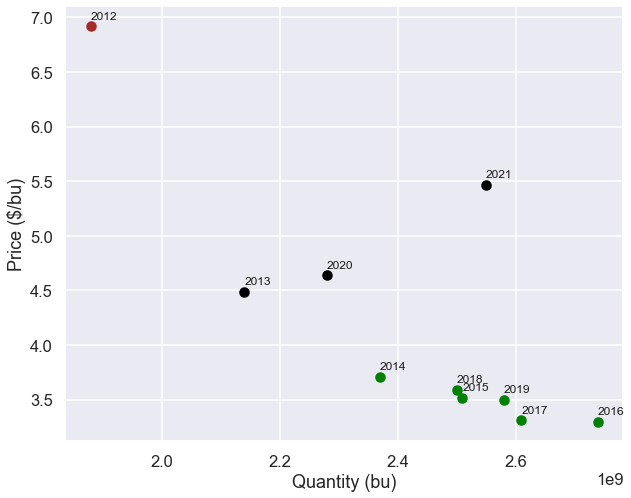

In [7]:
plt.figure(figsize=(10,8))
#color points by pdsi
plt.scatter(df.loc[df['pdsi']>=2,'quantity'],df.loc[df['pdsi']>=2,'price'],color='green')
plt.scatter(df.loc[df['pdsi']<=-2,'quantity'],df.loc[df['pdsi']<=-2,'price'],color='brown')
plt.scatter(df.loc[(df['pdsi']>-2) & (df['pdsi']<2),'quantity'],df.loc[(df['pdsi']>-2) & (df['pdsi']<2),'price'],color='black')
for i, r in df.iterrows():
    plt.text(r['quantity'],r['price']+0.05,int(r['year']),color='k',ha='left',va='bottom',fontsize=12)
plt.xlabel('Quantity (bu)')
plt.ylabel('Price ($/bu)')
plt.show()

The students don't have to generate another scatterplot like the one above, but should note the following. Compared to normal conditions (black dots), for wet conditions (green dots), the equiibrium quantity tends to be higher and the equilibrium price tends to be lower (i.e., tends to a more favorable supply curve). For dry conditions (brown dot), the equilibrium quantity is lower and the equilibrium price is higher (i.e., tends toward less favorable supply curve), but there is only one year of data to base this inference on.

6) Predict the effects of a very dry year (2 pts)

Based on 2012, a very dry year would likely have lower equilibrium quantity and a higher equilibrium price.

But probably would not be comfortable making a precise prediction, because there's only one datapoint to base this prediction on, and would be extrapolating beyond the range of the PDSIs given.

Would want to have more dry years, preferably very dry years, to compare to in order to arrive at a more confident prediction.